## Iris Data 

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

In [2]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                   train_size = 0.5, 
                                                   test_size = 0.5, 
                                                   random_state = 123)

#omitting train size and just use test size will complement the training data to equal 100%

In [5]:
## Checking the proportions of the target variable 
import numpy as np
print('All:', np.bincount(y) / float(len(y)) * 100)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100)
print('Test: ', np.bincount(test_y) / float(len(test_y)) * 100)

All: [33.33333333 33.33333333 33.33333333]
Training: [30.66666667 40.         29.33333333]
Test:  [36.         26.66666667 37.33333333]


### Stratified Data Partition

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   train_size = 0.5, 
                                                   test_size = 0.5, 
                                                   random_state = 123, 
                                                   stratify = y)

In [19]:
print('All:', np.bincount(y) / float(len(y)) * 100)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100)
print('Test: ', np.bincount(test_y) / float(len(test_y)) * 100)

#You want to simulate the real world so it's better to preserve the distirbution of classes so that your 
#algorithm is able to adapt and make better predictions

All: [33.33333333 33.33333333 33.33333333]
Training: [33.33333333 33.33333333 33.33333333]
Test:  [33.33333333 33.33333333 33.33333333]


In [20]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier().fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.score(X_test, y_test)

0.96

Identifying Correct Predictions

In [29]:
print('Samples Correctly Classified:')
correct_idx = np.where(y_pred == y_test)[0]
print(correct_idx)

Samples Correctly Classified:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 50 51 52 53 54 55 56 57 58 59 61 62 63 64 65 66 67 68 69 70 71 72 73 74]


Identifying Incorrect Predictions

In [30]:
print('Samples Incorrectly Classified:')
incorrect_idx = np.where(y_pred != y_test)[0]
print(incorrect_idx)

Samples Incorrectly Classified:
[44 49 60]


View those data points 

In [66]:
print('Data points:')
print(X_test[incorrect_idx,])
print('')

print('Actual Labels: ')
print(y_test[incorrect_idx,])
print(iris.target_names[y_test[incorrect_idx,],])
print('')

print('What the algorithm predicted: ')
print(y_pred[incorrect_idx,])
print(iris.target_names[y_pred[incorrect_idx,],])
print('')

Data points:
[[5.9 3.2 4.8 1.8]
 [6.7 3.  5.  1.7]
 [4.9 2.5 4.5 1.7]]

Actual Labels: 
[1 1 2]
['versicolor' 'versicolor' 'virginica']

What the algorithm predicted: 
[2 2 1]
['virginica' 'virginica' 'versicolor']



Plot the points identifying those that are incorretly  indentified

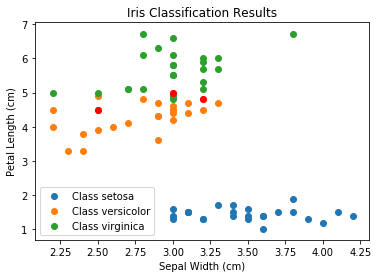

In [62]:
#Plot two dimensions 
import matplotlib.pyplot as plt

for n in np.unique(y_test):
    idx = np.where(y_test == n)[0]
    plt.scatter(X_test[idx, 1], X_test[idx, 2], label = 'Class %s' % str(iris.target_names[n]))
    
plt.scatter(X_test[incorrect_idx, 1], X_test[incorrect_idx, 2], color ='red')

plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(loc = 3)
plt.title('Iris Classification Results')
plt.show()

In [72]:
#The data points on the plot 
X_test[incorrect_idx][:, [1,2]]


array([[3.2, 4.8],
       [3. , 5. ],
       [2.5, 4.5]])

Using shapes in plot to visualize the mistakes

44: Predicted 2 True Label 1
49: Predicted 2 True Label 1
60: Predicted 1 True Label 2


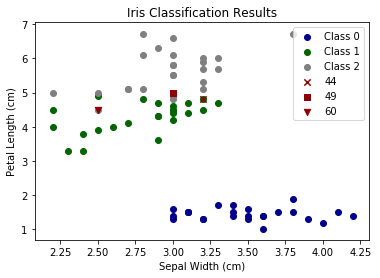

In [75]:
for i in incorrect_idx: 
    print('%d: Predicted %d True Label %d' % (i, y_pred[i], y_test[i]))

#plot the two dimensions 
colors = ['darkblue', 'darkgreen', 'gray']

for n, color in enumerate(colors):
    idx = np.where(y_test == n)[0]
    plt.scatter(X_test[idx, 1], X_test[idx, 2],
               color = color, label = 'Class %s' % str(n))
    
for i, marker in zip(incorrect_idx, ['x', 's', 'v']):
    plt.scatter(X_test[i, 1], X_test[i, 2],
               color = 'darkred',
               marker = marker,
               s = 40,
               label = i)
    
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(loc = 1, scatterpoints = 1)
plt.title('Iris Classification Results')
plt.show()